1. Goals: Perform the data exploration step
- evaluate your data
- number of observations
- details about your data distributions
- scales
- missing data
- column descriptions

2. plot your data --> scatter plot

3. How will you preprocess your data? You should explain this in your readme.md file and link your jupyter notebook to it. Your jupyter notebook should be uploaded to your repo.

#할일
1. data column 설명 적기
2. number of observation explicitly 적기
3. Standardization 해보기
4. histogram 으로 rating, actual_price, discount_rate
5. 단계별로 왜 했는지 좀 적기 (재민)
6. readme에 어떻게 프리프로세스 했는지 적기 (재민)
    - null drop
    - anomaly 제거
    - str --> float
    - normalize
    - 환율 바꾸기
    - 새로운 칼럼 만들기 discount_rate, agg_rating


In [ ]:
!git clone https://github.com/mickjeon/amazon_sales_prediction.git

fatal: destination path 'amazon_sales_prediction' already exists and is not an empty directory.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import re

## Televisions

## Column Description

In [ ]:
tv_raw_data = pd.read_csv("amazon_sales_prediction/dataset/Amazon Fashion.csv")
tv_raw_data.head()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Aqualogica Glow+ Dewy Sunscreen SPF 50 PA+++ F...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/51TSC6Uogx...,https://www.amazon.in/Aqualogica-Sunscreen-Pro...,4.2,"3,628",₹351,₹399
1,MARVIK Soft Silicone Adjustable Band Strap Com...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/51vYDop04S...,https://www.amazon.in/MARVIK-Silicone-Adjustab...,3.9,291,₹249,₹999
2,108 Panchatantra Stories for Children (Illustr...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/81VJ+MAc7Y...,https://www.amazon.in/108-Panchatantra-Stories...,4.4,"2,950",₹125,₹160
3,Black and White and Blue: Adult Cinema From th...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/51RIhaW3t1...,https://www.amazon.in/Black-White-Blue-Cinema-...,4.2,8,NaN,₹584.16
4,SAFARI 15 Ltrs Sea Blue Casual/School/College ...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/61kmCas5OC...,https://www.amazon.in/SAFARI-Ltrs-Casual-Backp...,4.0,"17,985",₹299,₹799


In [ ]:
tv_raw_data.describe()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
count,2352,2352,2352,2352,2352,2146,2146,2186,2341
unique,2185,1,1,2291,2352,30,1397,771,631
top,KAYU™ Boys Cotton Solid Regular Fit Capri 3/4t...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/51AuFOlT5w...,https://www.amazon.in/Aqualogica-Sunscreen-Pro...,4.2,1,₹299,₹999
freq,15,2352,2352,6,1,283,25,70,225


In [ ]:
tv_raw_data

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Aqualogica Glow+ Dewy Sunscreen SPF 50 PA+++ F...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/51TSC6Uogx...,https://www.amazon.in/Aqualogica-Sunscreen-Pro...,4.2,"3,628",₹351,₹399
1,MARVIK Soft Silicone Adjustable Band Strap Com...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/51vYDop04S...,https://www.amazon.in/MARVIK-Silicone-Adjustab...,3.9,291,₹249,₹999
2,108 Panchatantra Stories for Children (Illustr...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/81VJ+MAc7Y...,https://www.amazon.in/108-Panchatantra-Stories...,4.4,"2,950",₹125,₹160
3,Black and White and Blue: Adult Cinema From th...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/51RIhaW3t1...,https://www.amazon.in/Black-White-Blue-Cinema-...,4.2,8,NaN,₹584.16
4,SAFARI 15 Ltrs Sea Blue Casual/School/College ...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/61kmCas5OC...,https://www.amazon.in/SAFARI-Ltrs-Casual-Backp...,4.0,"17,985",₹299,₹799
...,...,...,...,...,...,...,...,...,...
2347,"Lakme Lip Love Gelato Lip Balm - Pink, Bubbleg...",stores,Amazon Fashion,https://m.media-amazon.com/images/I/61lc+uAfF0...,https://www.amazon.in/LAKM%C3%89-Love-Gelato-C...,4.1,515,₹148,₹199
2348,SATTVA Classy.Elegant.Stylish Classic XXXL Bea...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/71zaq78pO8...,https://www.amazon.in/Sattva-Classic-Filled-Be...,4.2,10,"₹2,170","₹4,299"
2349,Fastrack Glitch Analog Rose Gold Dial Women's ...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/61B+fqeyzj...,https://www.amazon.in/Fastrack-Glitch-Analog-W...,3.5,16,NaN,"₹5,595"
2350,NAINVISH Women/Girl's Pure Cotton Paisley Prin...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/81qATlsYzk...,https://www.amazon.in/NAINVISH-Cotton-Paisley-...,3.4,318,₹499,"₹2,599"


In [ ]:
print(tv_raw_data.isnull().sum())

name                0
main_category       0
sub_category        0
image               0
link                0
ratings           206
no_of_ratings     206
discount_price    166
actual_price       11
dtype: int64


In [ ]:
tv_raw_data.dropna(subset=['name', 'ratings', 'no_of_ratings', 'discount_price', 'actual_price'], inplace=True)
tv_raw_data

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Aqualogica Glow+ Dewy Sunscreen SPF 50 PA+++ F...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/51TSC6Uogx...,https://www.amazon.in/Aqualogica-Sunscreen-Pro...,4.2,"3,628",₹351,₹399
1,MARVIK Soft Silicone Adjustable Band Strap Com...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/51vYDop04S...,https://www.amazon.in/MARVIK-Silicone-Adjustab...,3.9,291,₹249,₹999
2,108 Panchatantra Stories for Children (Illustr...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/81VJ+MAc7Y...,https://www.amazon.in/108-Panchatantra-Stories...,4.4,"2,950",₹125,₹160
4,SAFARI 15 Ltrs Sea Blue Casual/School/College ...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/61kmCas5OC...,https://www.amazon.in/SAFARI-Ltrs-Casual-Backp...,4.0,"17,985",₹299,₹799
5,The Derma Co 1% Hyaluronic Sunscreen Aqua Ultr...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/51x3cj+-iU...,https://www.amazon.in/Derma-Co-Hyaluronic-Suns...,4.3,"5,830",₹448,₹499
...,...,...,...,...,...,...,...,...,...
2346,Puma Mens Tiguan Slipon Sneaker,stores,Amazon Fashion,https://m.media-amazon.com/images/I/81WP4z6J1Y...,https://www.amazon.in/Puma-Tiguan-Slipon-Mist-...,3.9,5,"₹1,882","₹3,799"
2347,"Lakme Lip Love Gelato Lip Balm - Pink, Bubbleg...",stores,Amazon Fashion,https://m.media-amazon.com/images/I/61lc+uAfF0...,https://www.amazon.in/LAKM%C3%89-Love-Gelato-C...,4.1,515,₹148,₹199
2348,SATTVA Classy.Elegant.Stylish Classic XXXL Bea...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/71zaq78pO8...,https://www.amazon.in/Sattva-Classic-Filled-Be...,4.2,10,"₹2,170","₹4,299"
2350,NAINVISH Women/Girl's Pure Cotton Paisley Prin...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/81qATlsYzk...,https://www.amazon.in/NAINVISH-Cotton-Paisley-...,3.4,318,₹499,"₹2,599"


In [ ]:
print(tv_raw_data.isnull().sum())

name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64


We have now confirmed that there aren't any data will null name, ratings, no_of_ratings, discount_price, actual_price

### We we now want to convert the currency. The dataset currently has the prices in Rupees, so we want to convert it to United States Dollars

In [ ]:
exchange_rate = 1 / 82.99 # Exchange rate as of 02/08/2024

def rupee_to_usd(x):
  return float(x[1:].replace(",", "")) * exchange_rate
def str_to_float(x):
  return float(x.replace(",", ""))
tv_raw_data['discount_price_usd'] = tv_raw_data['discount_price'].apply(lambda x: rupee_to_usd(x))
tv_raw_data['actual_price_usd'] = tv_raw_data['actual_price'].apply(lambda x: rupee_to_usd(x))
tv_raw_data['ratings'] = tv_raw_data['ratings'].apply(lambda x: np.nan if not str(x).replace('.', '').isdigit() else float(x))
tv_raw_data['no_of_ratings'] = tv_raw_data['no_of_ratings'].apply(lambda x: np.nan if not str(x).replace(',', '').isdigit() else str_to_float(x))
tv_raw_data.dropna(subset=['no_of_ratings', 'ratings'], inplace=True)
tv_raw_data


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_price_usd,actual_price_usd
0,Aqualogica Glow+ Dewy Sunscreen SPF 50 PA+++ F...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/51TSC6Uogx...,https://www.amazon.in/Aqualogica-Sunscreen-Pro...,4.2,3628.0,₹351,₹399,4.229425,4.807808
1,MARVIK Soft Silicone Adjustable Band Strap Com...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/51vYDop04S...,https://www.amazon.in/MARVIK-Silicone-Adjustab...,3.9,291.0,₹249,₹999,3.000361,12.037595
2,108 Panchatantra Stories for Children (Illustr...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/81VJ+MAc7Y...,https://www.amazon.in/108-Panchatantra-Stories...,4.4,2950.0,₹125,₹160,1.506206,1.927943
4,SAFARI 15 Ltrs Sea Blue Casual/School/College ...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/61kmCas5OC...,https://www.amazon.in/SAFARI-Ltrs-Casual-Backp...,4.0,17985.0,₹299,₹799,3.602844,9.627666
5,The Derma Co 1% Hyaluronic Sunscreen Aqua Ultr...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/51x3cj+-iU...,https://www.amazon.in/Derma-Co-Hyaluronic-Suns...,4.3,5830.0,₹448,₹499,5.398241,6.012773
...,...,...,...,...,...,...,...,...,...,...,...
2346,Puma Mens Tiguan Slipon Sneaker,stores,Amazon Fashion,https://m.media-amazon.com/images/I/81WP4z6J1Y...,https://www.amazon.in/Puma-Tiguan-Slipon-Mist-...,3.9,5.0,"₹1,882","₹3,799",22.677431,45.776600
2347,"Lakme Lip Love Gelato Lip Balm - Pink, Bubbleg...",stores,Amazon Fashion,https://m.media-amazon.com/images/I/61lc+uAfF0...,https://www.amazon.in/LAKM%C3%89-Love-Gelato-C...,4.1,515.0,₹148,₹199,1.783347,2.397879
2348,SATTVA Classy.Elegant.Stylish Classic XXXL Bea...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/71zaq78pO8...,https://www.amazon.in/Sattva-Classic-Filled-Be...,4.2,10.0,"₹2,170","₹4,299",26.147729,51.801422
2350,NAINVISH Women/Girl's Pure Cotton Paisley Prin...,stores,Amazon Fashion,https://m.media-amazon.com/images/I/81qATlsYzk...,https://www.amazon.in/NAINVISH-Cotton-Paisley-...,3.4,318.0,₹499,"₹2,599",6.012773,31.317026


In [ ]:
tv_raw_data.describe().round(2)

,ratings,no_of_ratings,discount_price_usd,actual_price_usd
count,1985.00,1985.00,1985.00,1985.00
mean,4.00,3088.89,10.13,23.12
std,0.37,8438.29,24.23,37.37
min,1.00,1.00,0.36,0.40
25%,3.80,115.00,3.00,7.21
50%,4.00,662.00,4.80,12.04
75%,4.20,2549.00,8.66,25.29
max,5.00,157480.00,778.94,877.21


In [ ]:
tv_data = tv_raw_data[['name', 'ratings', 'no_of_ratings', 'discount_price_usd', 'actual_price_usd']]
tv_data['discount_rate'] = (tv_data['actual_price_usd'] - tv_data['discount_price_usd']) / tv_data['actual_price_usd'] * 100
tv_data['agg_rating'] = tv_data['ratings'] * tv_data['no_of_ratings']
tv_data

<ipython-input-45-491fbea6e1fe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_data['discount_rate'] = (tv_data['actual_price_usd'] - tv_data['discount_price_usd']) / tv_data['actual_price_usd'] * 100
<ipython-input-45-491fbea6e1fe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_data['agg_rating'] = tv_data['ratings'] * tv_data['no_of_ratings']


,name,ratings,no_of_ratings,discount_price_usd,actual_price_usd,discount_rate,agg_rating
0,Aqualogica Glow+ Dewy Sunscreen SPF 50 PA+++ F...,4.2,3628.0,4.229425,4.807808,12.030075,15237.6
1,MARVIK Soft Silicone Adjustable Band Strap Com...,3.9,291.0,3.000361,12.037595,75.075075,1134.9
2,108 Panchatantra Stories for Children (Illustr...,4.4,2950.0,1.506206,1.927943,21.875000,12980.0
4,SAFARI 15 Ltrs Sea Blue Casual/School/College ...,4.0,17985.0,3.602844,9.627666,62.578223,71940.0
5,The Derma Co 1% Hyaluronic Sunscreen Aqua Ultr...,4.3,5830.0,5.398241,6.012773,10.220441,25069.0
...,...,...,...,...,...,...,...
2346,Puma Mens Tiguan Slipon Sneaker,3.9,5.0,22.677431,45.776600,50.460648,19.5
2347,"Lakme Lip Love Gelato Lip Balm - Pink, Bubbleg...",4.1,515.0,1.783347,2.397879,25.628141,2111.5
2348,SATTVA Classy.Elegant.Stylish Classic XXXL Bea...,4.2,10.0,26.147729,51.801422,49.523145,42.0
2350,NAINVISH Women/Girl's Pure Cotton Paisley Prin...,3.4,318.0,6.012773,31.317026,80.800308,1081.2


<Axes: >

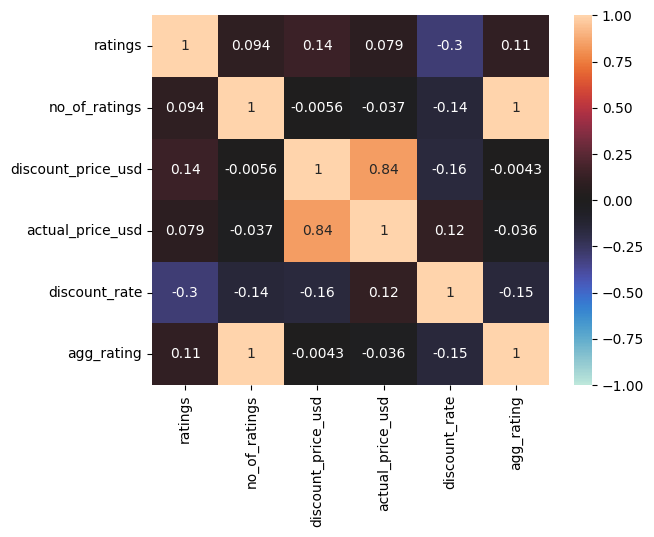

In [ ]:
sns.heatmap(tv_data.drop(tv_data.columns[0], axis=1).corr(), annot=True, vmin=-1, vmax=1, center=0)

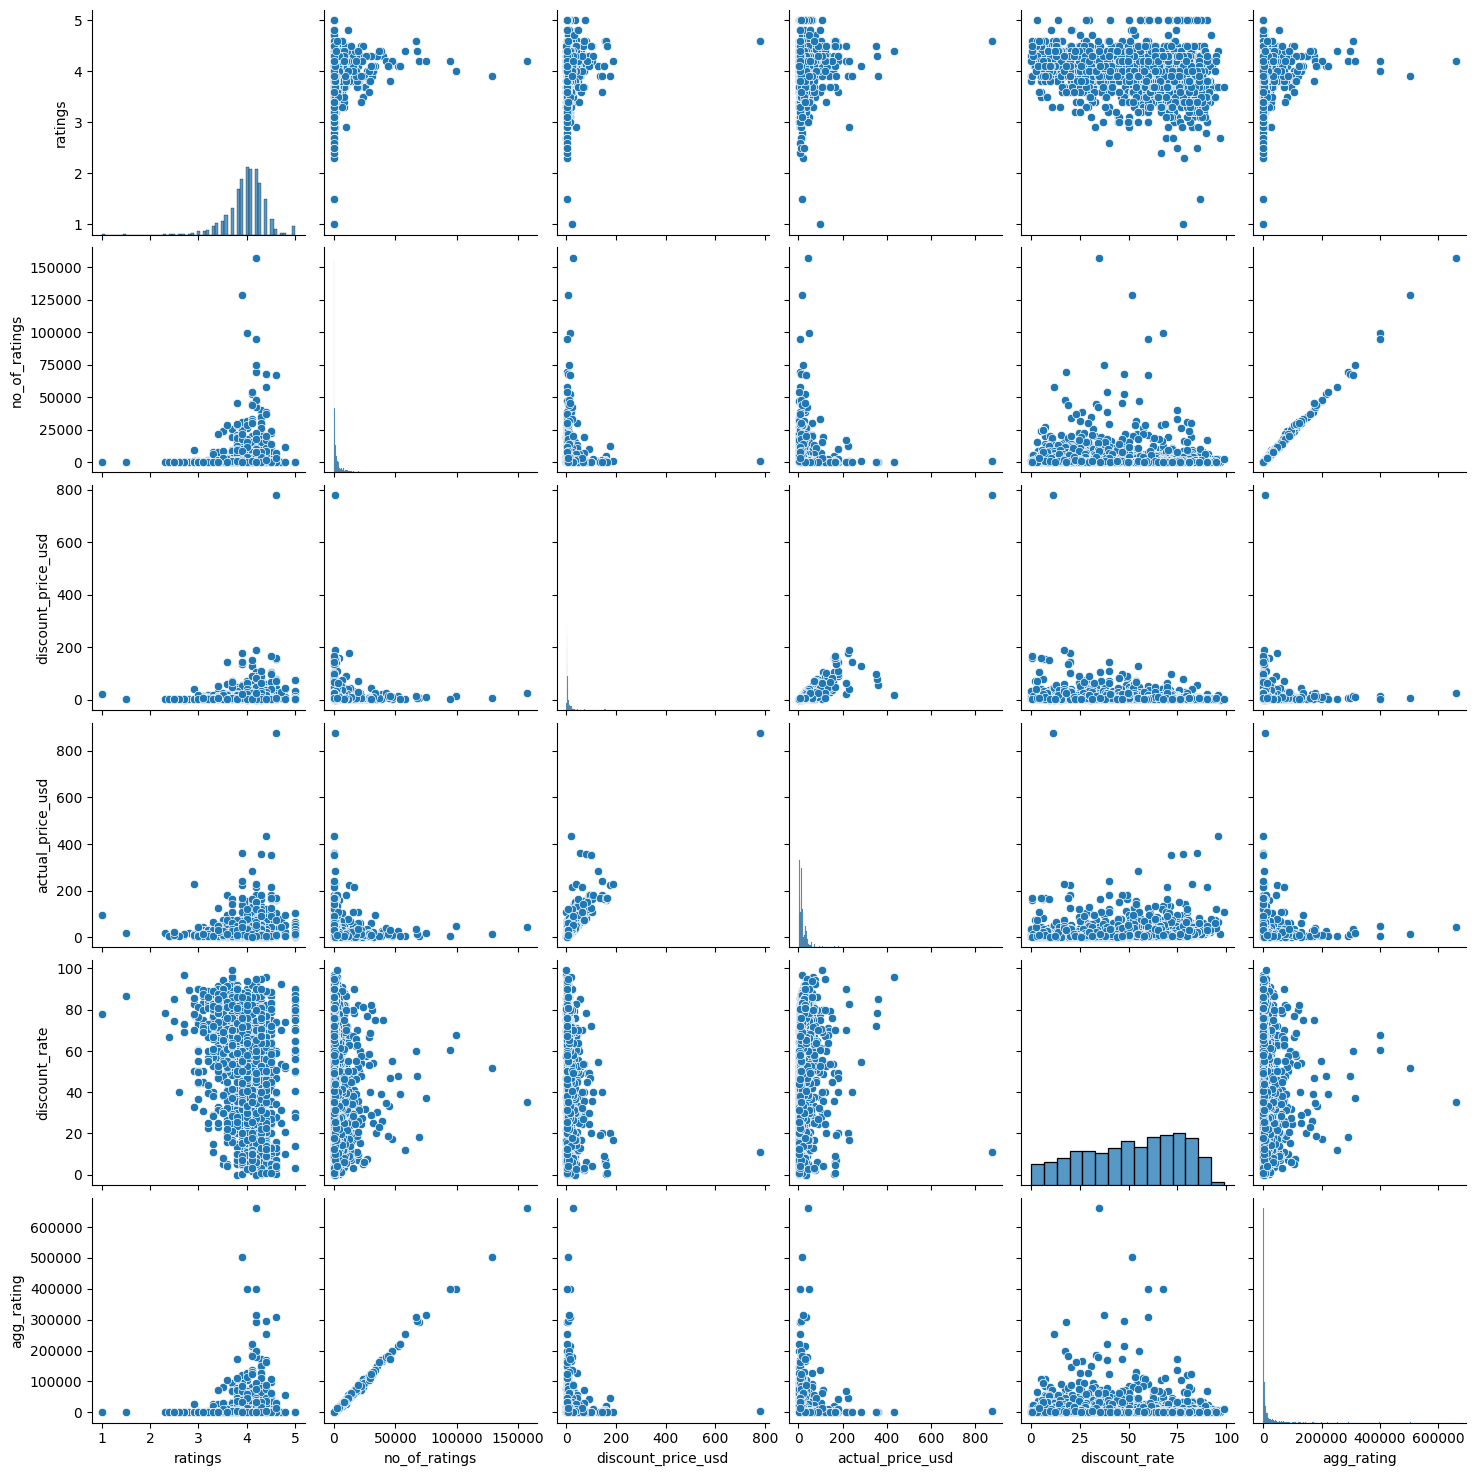

In [ ]:
sns.pairplot(tv_data)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = tv_data.drop(columns=['name'])
scaler = MinMaxScaler()
norm_data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)


In [ ]:
norm_data.describe().round(2)

,ratings,no_of_ratings,discount_price_usd,actual_price_usd,discount_rate,agg_rating
count,1985.00,1985.00,1985.00,1985.00,1985.00,1985.00
mean,0.75,0.02,0.01,0.03,0.52,0.02
std,0.09,0.05,0.03,0.04,0.25,0.05
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.70,0.00,0.00,0.01,0.31,0.00
50%,0.75,0.00,0.01,0.01,0.55,0.00
75%,0.80,0.02,0.01,0.03,0.74,0.02
max,1.00,1.00,1.00,1.00,1.00,1.00


<Axes: >

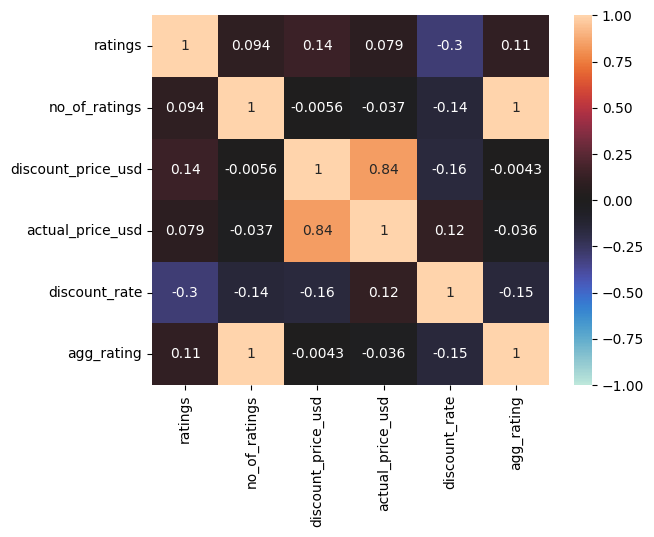

In [ ]:
sns.heatmap(norm_data.corr(), annot=True, vmin=-1, vmax=1, center=0)

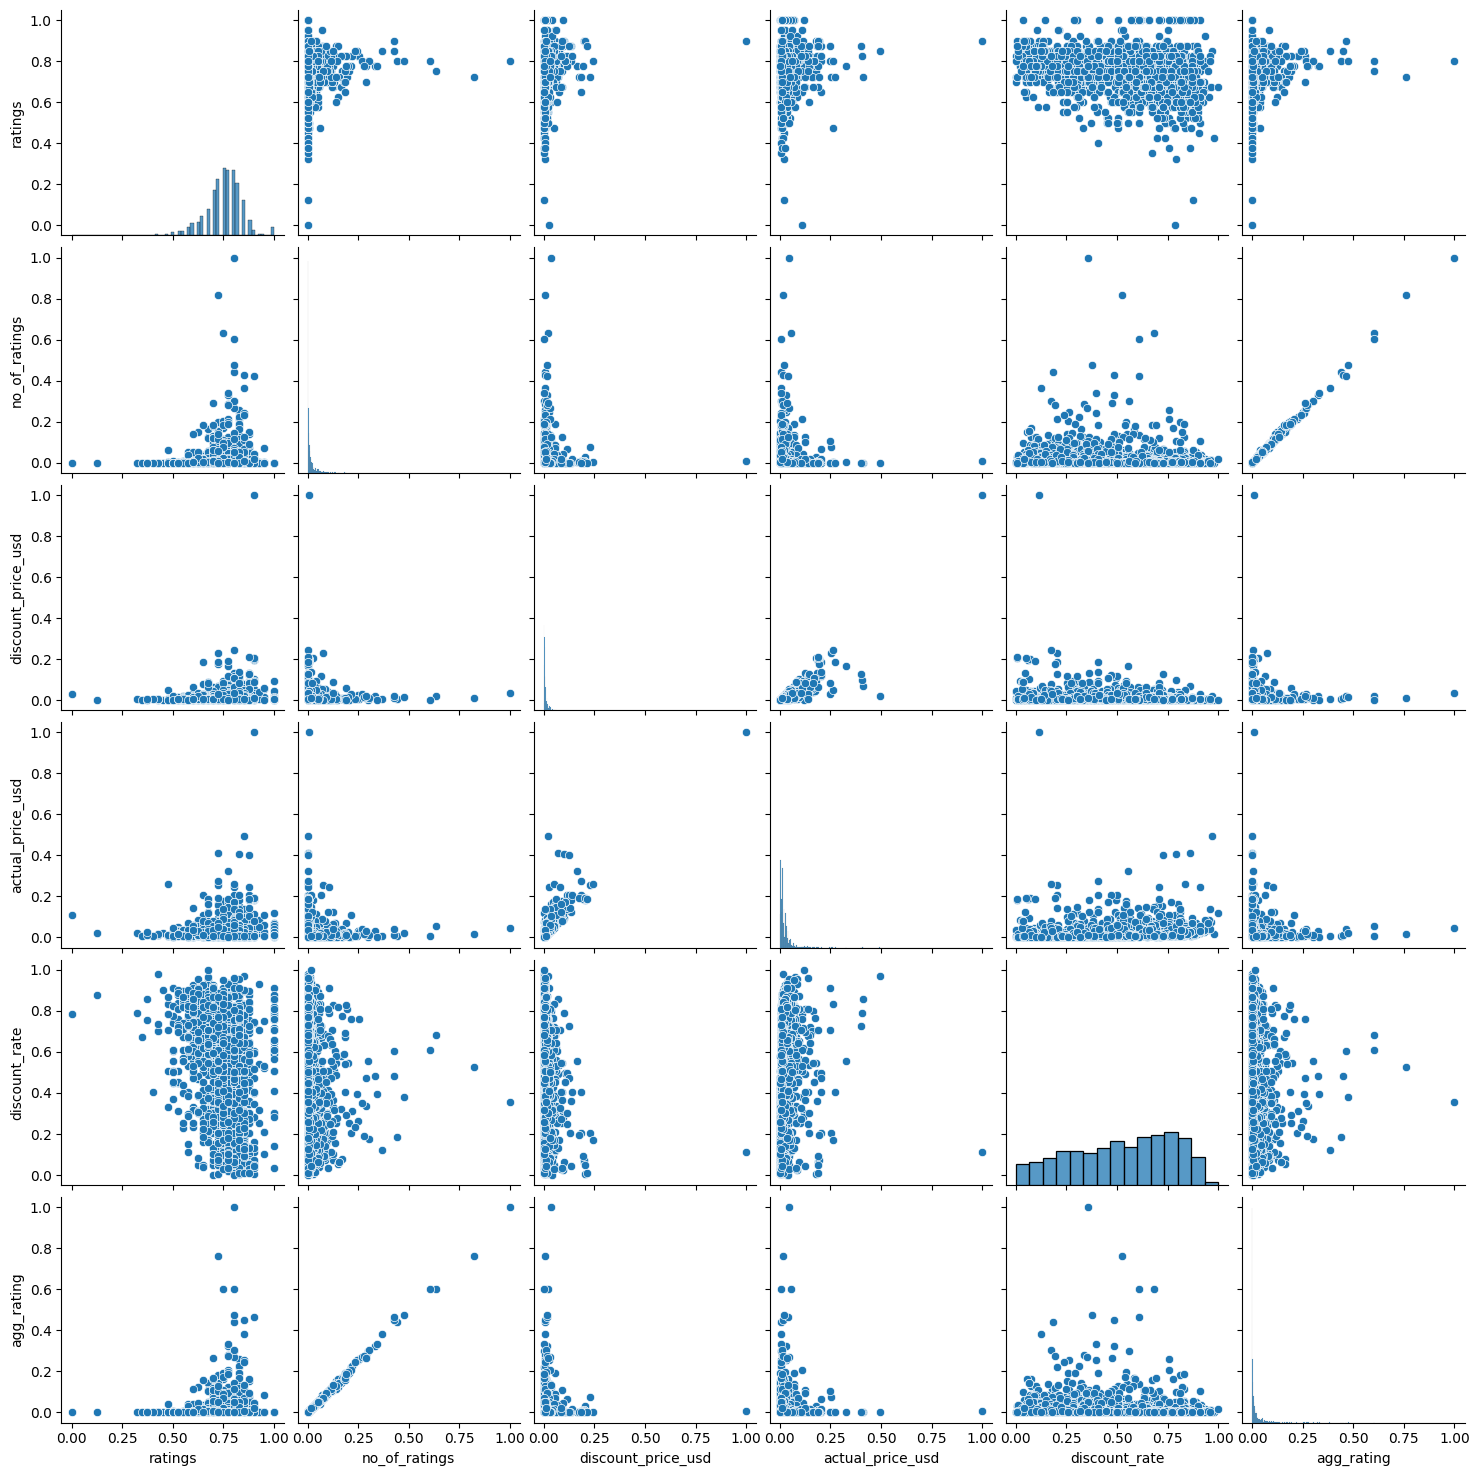

In [ ]:
sns.pairplot(norm_data)